# <center> RSA Cryptography Algorithm </center>
# <center> Project Report </center>
## Nick VanRensselaer 


## Overview

The RSA Algorithm is a method of cryptography developed by Ron Rivest, Adi Shamir, and Leonard Adleman at MIT (Massachusetts Institute of Technology) in 1977. Ron Rivest is a Institue Professor of Cryptography at MIT. "Institute Professor" is the highest title that a professor at MIT can obtain. Adi Shamir was doing research at MIT in 1977 when he, Rivest, and Adleman developed the RSA Algorithm. He is currently a Professor of Cryptography at the Weizmann Institute in Rehovot, Israel. Leonard Adleman was also doing research at MIT when the RSA Algorithm was developed. He is currently a Professor of Computer Science and Cryptography at USC (University of Southern California). The acronym "RSA" is used, as "R", "S", and "A" are the first letters of each of their last names. The RSA Algorithm is generally considered the most secure way of encryption. 

Up until the 1970s, governments and security agencies were using a method of cryptography known as symmetric key cryptography. This was effective but required the key to be shared between the two parties who wished to exchange encrypted messages. If those parties had not come in contact previously, this becomes more complicated. To explain symmetric key cryptography, think of a message; I will use the number '1234'. To encrypt it, I will mulitply it by the key '5678', which gives you the number '7006652'. Without the knowledge of the key, there is no way of knowing that the number '7006652' represents '1234'. When this is done many times to many different messages, you are able to see a pattern. Given enough data, you can find the key and therefore decrypt the encrypted message.  

The idea of asymmetric cryptography was new when Rivest, Shamir, and Adleman developed the RSA Algorithm. However, they were not the ones to come up with the idea of asymmetric cryptography. The first person to conceive of the idea was James H. Ellis, a British cryptographer at the UK GCHQ (Government Communications Headquarters), who published the idea in 1969. He had the idea of using two, separate keys; one to encrypt a message and another to decrypt the message. From that idea, Rivest, Shamir, and Adleman developed the RSA Algorithm and published it in 1977. Interestingly, around the same time a similar algorithm to RSA was developed by a man named Clifford Cocks, also from the UK GCHQ. But, that was developed and classified by the GCHQ in 1973. It was not declassified until 1997. 

The RSA Algorithm is an asymmetric algorithm, which as described above, uses two separate keys. One key is used to encrypt a message to a cyphertext and another to decrypt the ciphertext back to the original message. In the most basic form the RSA algorithm takes a message, often a series of numbers or words, and applies a Public Key to return an encrypted message (also called ciphertext). When someone wishes to decrypt that message, they apply a different key, called a Private Key to the ciphertext. From this, you will receive the original message.


## RSA Algorithm - Algorithm Description

1. Select two prime numbers $p$ and $q$
2. Calculate $n$. $n = p * q$
3. Calculate $\phi(n)$. $\phi(n) = (p-1)(q-1)$
4. Select $E$. Such that $E$ is relatively prime to $\phi(n)$. $_1$ 
5. Determine $D$. Such that $ E*D = 1\mod(n) $
6. The Public Key is set as the keypair $(E, n)$
7. The Private Key is set as the keypair $(D, n)$
8. For Encryption, use the Public Key to solve: $ C = M^e \mod(n) $
9. For Decryption, use the Private Key to solve: $ M = C^d \mod(n) $

<br>
A few important notes about the execution of this algorithm: 
* $n$ and $p$ must be prime and cannot be equal
* When selecting $E$, I chose to select a random number between 1 and $\phi(n)$ 
* When determining $D$, you need to use Euclid's Extended Algorithm to find the multiplicative inverse. $_2$
* From the code, both the Private and Public Key pairs are generated.

When executing this algorithm, the first few steps are easy. As mentioned, $p$ and $q$ must be prime. $n$ and $\phi(n)$ are easy to compute using simple math. When choosing a value for $E$, there are a few options, but in most real-world cases $E$ is chosen from the values $[3,5,17,257,65537]$. The value for $E$ is not necessarily important because $E$ is used for the Public Key and it is not used to decrypt the message. As mentioned above, $E$ must be relatively prime to $\phi(n)$. If two numbers are relatively prime, they share no common positive factors. The value for $D$ is more important because it is used to decrypt the message. When choosing $D$, it must remain true that $E*D = 1\mod(n)$. In other words, the greatest common divisor of $E$ and $D$ is equal to 1.  

Each step, and the code to perform each step is below.

### Algorithm Description  - Step by Step (with Python code)

The first three pieces that are needed for the implementation of the RSA Algorithm are related to prime numbers. The first, called 'is_prime(x)' tests a number and returns True (or False) if a number is (or is not) prime. This piece was important when I was testing the script. I used it to make sure the numbers that are inputed are prime. 

In [1]:
def is_prime(x):
    # Returns True if x is True, False if x is False
    # May not need this
    if x == 2:
        return True
    if x < 2 or x % 2 == 0:
        return False
    for n in range(3, int(x ** .5) + 2, 2):
        if x % n == 0:
            return False
    return True

The next piece is called 'are_rel_prime(a,b)'. This is vital in selecting and testing a value for $E$. It returns True if the numbers are relatively prime. Two numbers are relatively prime if the only number that divides them is 1.

In [2]:
def are_rel_prime(a, b):
    # Returns True if a and b are relatively prime
    # Relatively Prime means they share no common positive factors (other than 1).
    # In other words, the Greatest common divisor = 1
    if is_prime(a) is False:
        return 'A is not a Prime number.'
    elif is_prime(b) is False:
        return 'B is not a Prime number.'
    else:
        for n in range(2, min(a, b) + 1):
            if a % n == b % n == 0:
                return False

        return True

The third piece that I used is called 'get_primes(start, stop)'. It takes two numbers (start value and stop value) and returns a list of prime numbers between those numbers. This was not necessarily needed to correctly implement the RSA Algorithm. However, it made certain parts of the algorithm much easier. In particular, when choosing values for $p$ and $q$ it is much easier to choose them from a verified list of prime numbers than to put them in and receive an error. 

In [3]:
def get_primes(start, stop):
    # Returns a list of prime number between start and stop
    if start >= stop:
        return []

    primes = [2]
    for n in range(3, stop + 1, 2):
        for p in primes:
            if n % p == 0:
                break
        else:
            primes.append(n)

    while primes and primes[0] < start:
        del primes[0]

    return primes

The next few pieces of the code contain functions that employ the mathematical processes that are used in the RSA Algorithm. The first one, called 'gcd(a,b)', returns the greatest common divisor of two numbers. The greatest common divisor ot two numbers is the largest (non-zero) integer that divides both numbers. The code uses the Euclidean Algorithm to find the GCD. 

In [4]:
def gcd(a, b):
    # Finds the greatest common divisor of a and b
    # Uses the Euclidean Algorithm
    while b != 0:
        a, b = b, a % b
    return a

The next piece needed to implement the algorithm is called 'modinv(a, m)'. The 'modinv' function evaluates the existance of the modular multiplicative inverse. In simpler terms, it tests if $a$ and $m$ have a Greatest common divisor (GCD) of 1. This piece is necessary when determining the value for $D$. In this case, it executes the equation  $(ax)\mod(m)$ and finds the value for $x$ where that equation equals 1. 

In [5]:
def modinv(a, m):
    # This returns a number that is the modular multiplicative inverse of a and m
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None

The next three pieces are the most important of this implementation of the RSA Algorithm. In these pieces, everything is put together, the Public and Private keys are created, the message is encrypted, and the ciphertext is decrypted. The first piece is called 'generate_keypair(p, q)'. Using the given values for $p$ and $q$, first it uses the 'is_prime(x)' function to make sure the values are prime. Following that, it goes through each of the step in the Algorithm above until the Public and Private KeyPairs are generated. First, it calculates $n$, $\phi(n)$, and selects a value for $E$. And finally, it determines a value for $D$ using the 'modinv()' function. 

In [6]:
def generate_keypair(p, q):
    # This generates the Public and Private key pairs
    # It uses the RSA Cryptography Algorithm

    # This checks that both inputs are prime numbers and not equal
    if not (is_prime(p) and is_prime(q)):
        raise ValueError('Both numbers must be prime.')
    elif p == q:
        raise ValueError('p and q cannot be equal.')

    # Calculate n
    n = p * q

    # Calculate Phi
    phi = (p - 1) * (q - 1)

    # Select E, where E is relatively prime to phi
    e = random.randrange(1, phi)
    # e = 65537

    # Checks that e and phi are relatively prime.
    # If not, reassigns e
    g = gcd(e, phi)
    while g != 1:
        e = random.randrange(1, phi)
        g = gcd(e, phi)

    # Determine D using the multiplicative inverse
    d = modinv(e, phi)

    # Returns the Public and Private Keys
    # Public Key pair is (e, n)
    # Private Key pair is (d, n)
    return ((e, n), (d, n))

The next piece for this implementation of the RSA Algorithm uses the Public Key and the equation  $ C = M^e \mod(n) $ to find the encrypted ciphertext. The key to this working correctly is the use of the 'ord()' function in Python. It takes a unicode character and returns an integer representation of that character. For each character/number/letter in the message, it assigns the correct integer to represent it. This returns a list of individual values for each character in the message text. In order for it to be shown correctly, it must be joined together using a lambda function (see below in Test Script).

In [7]:
def encrypt(pub_key, plaintext):
    # Unpack the key into its components
    key, n = pub_key
    # Convert each letter in plaintext to numbers based on the character
    # Uses C = M^E mod N
    cipher = [(ord(char) ** key) % n for char in plaintext]
    # Return array of bytes
    return cipher

The final piece of this implementation of the RSA Algorithm uses the Private Key and the equation $M = C^d \mod(n) $ to return the original message. The key to this working correctly is the use of the 'chr()' function in Python. The 'chr()' function takes an integer and returns the unicode character representation of that integer. It performs that operation for each set of numbers in the ciphertext. This returns a list of characters, joined together.

In [8]:
def decrypt(priv_key, ciphertext):
    # Unpack the key into its components
    key, n = priv_key
    # Convert to plaintext based on the ciphertext
    # Uses M = C^D mod N
    plain = [chr((char ** key) % n) for char in ciphertext]
    # Return the array of bytes as a string
    return ''.join(plain)

### Algorithm Description - Differences in Implementation

In this implementation of the RSA Algorithm there are a few things that are different than typical RSA Algorithm implementations. First, when choosing values for $p$ and $q$, I chose to use random numbers. To do this correctly, I used the 'get_primes(start, stop)' function and took a random choice within that range of values. I chose to do this because it was easier to use the 'get_primes()' function than to come up with hundreds of different prime number pairs. Because I was not using huge ranges of possible numbers, I ran into the case where the random $p$ and $q$ values were the same. To fix this, I added a line to test if they were the same, if they are, it changes one value to a different number.

Next, I chose to use a random number between $1$ and $\phi(n)$ for the value of $E$. I then had to test if the GCD of this $E$ value and $\phi(n)$ was equal to 1. If that was not equal to 1, then I reassigned $E$. This might have made it more difficult to find $D$, but using the 'modinv()' function I was able to find a $D$ value that satisfies the equation  $ E*D = 1\mod(n) $. A lot of RSA Algorithm explanations recommended to use the value 65537 for $E$, so my code is able to do that as well.  

In real-world application of the RSA Algorithm, most applications use a key length of 4096 bits. With a key length of 4096 bits, the $p$ and $q$ values are typically 2048 bits. After encryption, this corresponds to message lengths of roughly $10^{1233}$. Because of the sheer length of message values, this makes the RSA Algorithm incredibly difficult to break. 

For the purposes of this project, I was not able to use values anywhere close to that. My biggest concern was not creating encrypted messages that were difficult to break, but it was being able to correctly test and prove the complexity of the algorithm. If I were to use numbers with 2048 bits as my $p$ and $q$ values, the encryption and decryption would take a significant amout of time on most desktop or personal computers. Because of the empirical testing plan that I chose to use, it would not have been possible to run and analyze in the given timeframe. For instance, the largest possible number I used was 4000, which is only represented by 12 binary bits (1111 1010 0000). 

## RSA Algorithm - Example 

In order to depict the application of the RSA Algorithm, here is a step-by-step example using simple numbers so that it is easy to understand how the algorithm is working. For this example, the message will be "I love Algorithms!". I will use $p = 13$, $q = 17$, and $E = 11$. 

We need to then calculate $n$ and $phi$.
$n = 13 * 17 = 221$ <br>
$\phi(n) = (p - 1)*(q - 1) = (13-1)*(17-1) = 192$

To find a valid $D$ value, you must apply the 'modinv()' function, or manually find a number where the GCD of $E$ and $\phi(n)$ is 1. 

In [9]:
modinv(11, 192)

35

Using the 'modinv' function, you find that $D = 35$.

Next we will assign the keypairs. The Public Key is (11, 221). The Private Key is (35, 221). 

After that, we apply the 'encrypt' function to get the ciphertext from the message. The 'encrypt' function will return a list of the integer representations of the characters in the message. They have to be joined together to receive a continuous message. 

In [10]:
public_key_example = (11,221)
message = 'I love Algorithms!'

encrypted_txt = encrypt(public_key_example, message)
ciphertext = ''.join(map(lambda x: str(x), encrypted_txt))
print(ciphertext)

96128192151181861287819210315108921291959912367


As shown, when we apply the 'encrypt()' function to our original message, we get the encrypted ciphertext of '96128192151181861287819210315108921291959912367'. We would be able to send this to anyone and without the Private Key, they would not know what we were trying to tell them. 

To get the message out of the ciphertext, we need to apply the Private Key and the 'decrypt()' function. As you can see, the result from decryption gives us our original message back. 

In [11]:
private_key_example = (35,221)
out = decrypt(private_key_example, encrypted_txt)
print (out)

I love Algorithms!



## RSA Algorithm - Test Script

Below is an example of the code I developed to create the data I used to empirically test the RSA Algorithm. Below the script, I explain the methodology and logic behind the way I chose to run the RSA Algorithm. For this example, I chose a low range of possible $p$ and $q$ values (100 to 1000). In this example, I also used the same message as I did above; 'I love Algorithms!'.

In [12]:
import random
import time
import statistics as st
import csv

if __name__ == '__main__':
    # Change these variables for various runs
    runs = 3            # number of runs of each p and q values
    trials = 3          # number of different p values to run
    message = 'I love Algorithms!'    # the message to be encrypted and decrypted
    file = 'output_case_example.csv'  # file name for testing case
    low = 100        # low cap for p and q values
    high = 1000          # high cap for p and q values

    # initialize p and q lists, these will hold p and q values
    p = []
    q = []

    # This creates the p and q values for random intervals
    # It pulls from the get_primes function
    # Range is the length of the p and q random lists (number of runs)
    for i in range(trials):
        x = random.choice(get_primes(low, high))
        y = random.choice(get_primes(low, high))

        # If the chosen p = q, a new x (p) is chosen.
        if x == y:
            x = random.choice(get_primes(low, high))

        p.append(x)   # adds p value to the p list
        q.append(y)   # adds q value to the q list

    # Main is the list that contains all of the pertinent information for the RSA algorithm output
    # main = [[p values], [q values], [time values (t)], [average values of each t list]]
    main = [p, q, [], []]

    # These variables are for output formatting.
    dash = '-' * 60
    dash2 = '-' * 30

    lp = len(main[0])  # number of p/q values, could probably use runs instead
    for n in range(lp):
        main[2].append([])
        main[3].append([])
        for times in range(runs):
            p_val = main[0][n]
            print ('p value is: ', p_val)   # prints p value
            q_val = main[1][n]
            print ('q value is: ', q_val)   # prints q value

            start = time.time()   # Starting timer, right before algorithm starts

            public, private = generate_keypair(p_val, q_val)
            print ('Public key : ', public)   # prints public key
            print ('Private key : ', private)   # prints private key

            encrypted_msg = encrypt(public, message)
            print ('Your encrypted message is: ', ''.join(map(lambda x: str(x), encrypted_msg)))
            print ('Your message is: ', decrypt(private, encrypted_msg))   # this prints the decrypted message

            end = time.time()    # Ending timer, right after algorithm ends (message is decrypted)

            total = end - start   # calculates total time taken
            print ('Time : ', total)   # The current run's time
            main[2][n].append(total)

            avg = st.mean(main[2][n])  # averages list of run times

            print ('T[n] contains: ', main[2])   # This is the current state of T(n), the times list
            print (dash2)

        main[3][n].append(avg)    # This adds average value to list
        print ('The Average of T[n] is ', main[3])
        print ('')
        print (dash)
        print ('')

    print ('\n', dash)
    print ('', dash, '\n')

    # Prints out run summaries, giving p and q values, all run times and average run times
    for i in range(lp):
        print ('Run {}:'.format(i))
        print ('  p and q values are, {} and {}.'.format(main[0][i], main[1][i]))
        print ('  The run times were:')
        print ('  ', main[2][i])

        print ('  The average run time is: {}'.format(main[3][i]))

    # writes output data to a csv (comma separated values) file
    with open(file, 'w', newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(['p values', 'q values', 'run times', 'Avg run time'])
        for i in range(lp):
            for j in range(runs):
                wr.writerow([main[0][i], main[1][i], main[2][i][j], main[3][i][0]])

    print ('\n', 'csv file has been written.')

p value is:  277
q value is:  631
Public key :  (160739, 174787)
Private key :  (147059, 174787)
Your encrypted message is:  1033638694073389676025252115764486940160225733895307467602287881216611442001138451364135125651253
Your message is:  I love Algorithms!
Time :  2.259235382080078
T[n] contains:  [[2.259235382080078]]
------------------------------
p value is:  277
q value is:  631
Public key :  (159011, 174787)
Private key :  (161531, 174787)
Your encrypted message is:  8865514373045995143469204722813514373011359445995374401434691543571396515721970581338453572865777
Your message is:  I love Algorithms!
Time :  2.4680819511413574
T[n] contains:  [[2.259235382080078, 2.4680819511413574]]
------------------------------
p value is:  277
q value is:  631
Public key :  (58157, 174787)
Private key :  (40013, 174787)
Your encrypted message is:  1656971241691515001410391317162781124169767601515001076561410392752616612333954148898163675146200144025
Your message is:  I love Algorithms!
Time 

First, in order to get a accurate reading on run times for each range of $p$ and $q$ values, the script has the ability to run different $p$ and $q$ values, both randomly generated and assigned, and then run them multiple times. This lets you take the average over a larger portion of the value range. I am using two variables for these instances, $runs$ and $trials$. $Runs$ is the number of times each of the $p$ and $q$ values are run. $Trials$ is the number of different $p$ and $q$ values to be run. 

I chose to keep all of the information for each run in a multi-dimensional list. This made it easier to keep and update the information so mulitple variables and lists were not necessary. This list is called $main[]$, (main = [[p values], [q values], [time values (t)], [average values of each t list]]). Inside each of these sub-lists, are multiple sub-lists filled with the correct values and output data generated by the test script. Based on the number of runs and trials chosen, the first two sub-lists are filled with correct number of random pairs of $p$ and $q$. The third sub-list is populated with the time values of each run of each $p$ and $q$ value. The fourth sub-list inside of 'main[]' is populated with the average of each trial. 

After $p$ and $q$ are initiated, a series of 'for' loops runs through each of the sets of $p$ and $q$ values, and runs them however many times were specified in the $runs$ variable. 

The actual code that executes the algorithm is surrounded by the timer function. This measures the time taken to generate a keypair, encrypt, and decrypt a message. These times are measured and added to the third sub-list inside of the $main[]$ list. Once each set of $p$ and $q$ values is complete, they are averaged, and that result is added to the fourth sub-list. These values are what I will use to analyze the complexity of the RSA Algorithm. 


## RSA Algorithm - Empirical Analysis

When I was developing the test script and testing methods, I came up with a few variables that may impact run times of the RSA Algorithm. The first was the most obvious: $p$ and $q$ values. The next was message length. I wondered how much changing the $p$ and $q$ values and message length would have on the run times of the algorithm. So, I chose to vary the message lengths and $p$ and $q$ values.   

The length types that I chose to test were: messages of all letters and messages of mixed numbers/characters. The three message lengths I chose were 4 characters, 8 characters, and 12 characters. This gives 6 different message combinations. Along with the combinations of messages, as mentioned above, I also used 8 different p/q value ranges. This gave me 48 different combinations to test. 

Here is the list of $p$ and $q$ values, as well as the message values:

| Case # | $p$ and $q$ Value Ranges| 
| --- | ---|
| 1 | 10 - 100 | 
| 2 | 100 - 500 | 
| 3 | 500 - 1000 | 
| 4 | 1000 - 1500 | 
| 5 | 1500 - 2000 | 
| 6 | 2000 - 2500 | 
| 7 | 2500 - 3000 |
| 8 | 3000 - 4000 |

| All Letters | Mixed Numbers/Symbols | 
| --- | --- | 
| 'dYQc' | '#7,1' | 
| 'TajaAxim' | '@$!83_64' |
| 'ZgmmFsVOpYtd' | '010%95!!.41-' |


My original plan was to test more combinations, but given the limitations of running this algorithm on a personal computer and the method I chose to test the algorithm, it was hard to run tests on large numbers or large message values. I realized quickly that as the input values grow, the time it takes to run multiple times, grows even faster. 

When choosing the specifc messages for the test cases, I decided to make the messages as random as possible. For the all-letter messages, I randomly used lower-case and upper-case letters. I also added some repeating values to see if the algorithm would be able to separate them. For the number/symbol cases, I mixed the order of switching between symbol and number; trying not to have a pattern. I believe that I came up with good messages to properly test the RSA Algorithm's capabilities.

As I was devising the test methods that I used to analyze the algorithm, I noticed that the run times had wide range of values. As an example, with the message 'ZgmmFsVOpYtd' and $p$ and $q$ values of 2851 and 2741 respectively, the run times of a single run varied from 70.04700040817261 seconds to 475.9360959529876 seconds. I wondered what could cause such a variance in run times. After studying and comparing each case, I am not completely sure why there is such a variance in these times. My hypothesis is that certain key values are easier to factor and therefore the operations can be performed quicker.

In the case above, the other three run times were 231.3450891971588 seconds, 408.9763021469116 seconds, and 406.16299271583557 seconds. The average of all five of these run times is about 319 seconds, which at first glance gives a decent picture of the run times for this message. However, when I ran a few other $p$ and $q$ values, in that range there were run times above 1000 seconds. I realized that one pair of $p$ and $q$ values does not give an accurate picture of the true average run times over the ranges I settled on. Because of this (as discussed in the Test Script section), I chose to run five different pairs of $p$ and $q$ values, five times each. When I took the averages of those 5 runs, I received values that more accurately describe the run times of each $p$ and $q$ value range. It is with these values that I analyzed the RSA Algorithm.

To find these values, I used the 'Test Script' above and ran five random $p$ and $q$ values, five times. 

In order to efficiently see and work with the data, when this script runs, the pertinent data is written to a .csv (comma sepparated values) file. It is written in a readable (and iterable) format. In the columns of the csv file, I chose to write the $p$ and $q$ values, individual run times, and average run times to a .csv file. 

To work with the data from each csv file, I used a function that I created called 'find_averages()'. This allowed me to use a list of file paths as the input. With each file path (for each file), I read the data and created a list of the average values. Because I just needed the average run time for each trial, I had to read every fifth line and take the value from the last column. For each trial, I added this average value to a list (called 'df_new'). The 'df_new' list is iterated through and the average of that list is calculated. 

Here is the code for that function: 

In [13]:
import pandas as pd

def find_averages(file_list):
    # Takes in a list of file locations.
    # Files should be csv files written using Testing main script
    # Returns a list of averages 
    averages = []

    # Iterate through files in list
    for files in file_list:
        path = files
        # Read file using pandas read_csv()
        df = pd.read_csv(path)
        df_new = []

        # Reads every 5 lines 
        # Reads last (fourth) column to get average values
        for i in range(0,25,5):
            current = df.iat[i,3]
            df_new.append(current)

        # This takes average of the list of averages 
        length = len(df_new)
        sum = 0
        for i in df_new:
            sum = sum + i

        avg = sum / length

        averages.append(avg)
        
    return averages

The input to the 'find_averages()' function is a list of file names. Here is an example of the lists for every message case. (File locations will vary based on individual file paths).

In [14]:
file_list1 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_dYQc.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_dYQc.csv', 
            ]

file_list2 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_TajaAxim.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_TajaAxim.csv', 
            ]

file_list3 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_ZgmmFsVOpYtd.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_ZgmmFsVOpYtd.csv', 
            ]    

file_list4 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_#7,1.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_#7,1.csv', 
            ]


file_list5 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_@$!83_64.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_@$!83_64.csv', 
            ]

file_list6 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_010%95!!.41-.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_010%95!!.41-.csv', 
            ]    

In [15]:
average1 = find_averages(file_list1)
print ('Average1 contains: ', average1)
print ('')
average2 = find_averages(file_list2)
print ('Average2 contains: ', average2)
print ('')
average3 = find_averages(file_list3)
print ('Average3 contains: ', average3)
print ('')
average4 = find_averages(file_list4)
print ('Average4 contains: ', average4)
print ('')
average5 = find_averages(file_list5)
print ('Average5 contains: ', average5)
print ('')
average6 = find_averages(file_list6)
print ('Average6 contains: ', average6)


Average1 contains:  [0.0005980587005615235, 0.07761548042297363, 1.7739785671234132, 11.076130332946779, 30.643174896240232, 75.95770495414735, 155.0404865837097, 263.17891869544985]

Average2 contains:  [0.00016045570373535156, 0.10596629142761231, 2.5768411827087405, 21.853904428482057, 49.00447931289673, 127.21466520309448, 184.0723272705078, 637.0173155879975]

Average3 contains:  [0.0005200958251953124, 0.21304267883300781, 5.511229343414307, 28.91593647003174, 100.6058957862854, 239.15254046440123, 405.0022849941254, 1077.6861021995544]

Average4 contains:  [0.0006771183013916016, 0.08979175567626954, 2.2055119609832765, 11.159185934066773, 30.774020738601685, 67.72300849914551, 132.1384655189514, 315.335030670166]

Average5 contains:  [0.0003989410400390625, 0.39139397621154787, 3.401257696151734, 25.872596387863155, 50.82829358100891, 120.93762168884277, 560.1779413604736, 521.9217684650421]

Average6 contains:  [0.0006383037567138671, 0.2931334114074707, 5.319316940307617, 27.

Once all of the runs finish, the list of average run times can be assembled. From these lists, I will be able to form a graph for each of the six cases. Given this data, I should be able to tell a pattern of complexity for the RSA Algorithm. As I evaluate the results, I hope to be able to confirm the complexity of the RSA Algorithm. 

## RSA Algorithm - Evaluation 

The first step in evaluating the RSA Algorithm is to analyze the code for the theoretical complexity. The parts of the algorithm code that will be included in the evaluation are: the 'generate_keypair()' function, the 'encrypt()' function, and the 'decrypt()' function. 

First, the 'generate_keypair()' function. The first few steps of this function are simple: Calculate n, Calculate Phi, and Select E. Each of these can be accomplished in $O(1)$ time. The next part of this function is to determine D using the multiplicatave inverse ('modinv()'). This function only contains a single 'for' loop to find the modular invers of the two numbers. This function can be accomplished in $O(n)$ time. 

The second function is the 'encrypt()' function. This function has just a few lines, but within those lines a lot is happening. The important piece of the function is the 'for' loop in the 'cipher' variable. This loop should run in $O(n)$, because it is only running through each character in the message once. However, it is performing modular multiplication in that 'for' loop. Because of this, the 'encrypt()' function should be accomplished in $O(log(n)^2)$ time. The same can be said for the 'decrpyt()' function. It is performing the same (but opposite) operation as 'encrypt()'.  

When you combine the three pieces, you should get the theoretical time complexity $2O(log(n)^2) + O(n)$. However, the actual worst case time complexity of the RSA Algorithm turns out to be $O(n^2)$. 

In order to prove this, I will show the graphs of each run and the data that was derived from the testing. 

When I began to analyze and graph the performance of the various runs, I observed a pattern of run times forming. At first instinct, it seemed like the time complexity of this algorithm would be along the lines of $O(n^2)$. Here is the data of the run times for each message case. 

__<center> All Letter Message - Average Run Times </center>__

| Range of $p$ and $q$ |  'dYQc' | 'TajaAxim' | 'ZgmmFsVOpYtd' |
| --- | --- | --- | --- |
| 10 - 100 | 0.0005980587005615235 | 0.00016045570373535156 | 0.0005200958251953124 |
| 100 - 500 | 0.07761548042297363 | 0.10596629142761231 | 0.21304267883300781 |
| 500 - 1000 | 1.7739785671234132 | 2.5768411827087405 | 5.511229343414307 |
| 1000 - 1500 | 11.07613033294677 | 21.853904428482057 | 28.91593647003174 |
| 1500 - 2000 | 30.64317489624023 | 49.00447931289673 | 100.6058957862854 |
| 2000 - 2500 | 75.95770495414735 | 127.21466520309448 | 239.15254046440123 |
| 2500 - 3000 | 155.0404865837097 | 184.0723272705078 | 405.0022849941254 |
| 3000 - 4000 | 263.17891869544985 | 637.0173155879975 | 1077.6861021995544 |


__<center> Numbers/Symbols Message - Average Run Times </center>__

| Range of $p$ and $q$ |  '#7,1' | '@$!83_64' | '010%95!!.41-' |
| --- | --- | --- | --- |
| 10 - 100 | 0.0006771183013916016 | 0.0003989410400390625 | 0.0006383037567138671 |
| 100 - 500 | 0.08979175567626954 | 0.39139397621154787 | 0.2931334114074707 |
| 500 - 1000 | 2.2055119609832765 | 3.401257696151734 | 5.319316940307617 |
| 1000 - 1500 | 11.159185934066773 | 25.872596387863155 | 27.48048686981201 |
| 1500 - 2000 | 30.774020738601685 | 50.82829358100891 | 141.54347071647643 |
| 2000 - 2500 | 67.72300849914551 | 120.93762168884277 | 228.34069644927976 |
| 2500 - 3000 | 132.1384655189514 | 560.1779413604736 | 400.9949953556061 |
| 3000 - 4000 | 315.335030670166 | 521.9217684650421 | 911.9913842105867 |


Simply seeing the run times, you cannot tell precisely what time complexity the algorithm has. All you can tell is that the run times increase quickly. In order to picture the complexity of the RSA Algorithm, it must be graphed. To graph these values, I used similar code to the code given to us in the Data Structures iPython Notebook. Here is the code that I used to generate the graphs for each message case:

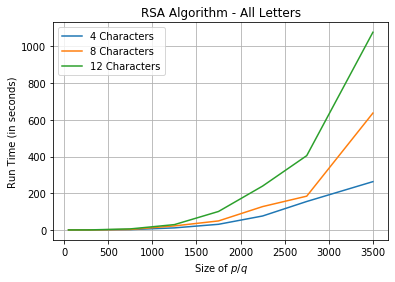

In [16]:
from matplotlib import pyplot as plt

# Set list values from file path lists
average1 = find_averages(file_list1)
average2 = find_averages(file_list2)
average3 = find_averages(file_list3)

if (len(average1) != len(average1) != len(average1)): 
    raise ValueError('Lengths of the File Lists must be same length')

# Since lists are all the same length, the length can be taken from any of them
len_list = len(average1)

# Using the mid-points to denote each range
middles = [50, 300, 750, 1250, 1750, 2250, 2750, 3500]

df = pd.DataFrame({'Size of $p/q$':  middles,
                   '4 Characters':   average1,
                   '8 Characters':   average2,
                   '12 Characters':  average3, 
                  })
                   
df.set_index('Size of $p/q$', drop=True, inplace=True)

fig = df.plot().get_figure()
plt.title('RSA Algorithm - All Letters')
plt.ylabel('Run Time (in seconds)')
plt.grid()

It is evident that all three curves in this case have graphs that increase quickly. But at first glance, most people would say these graphs do not depict the same function. When looked at in the same plot, you cannot see that each line takes approximately the same path. In order to see that, they must be examined individually. 

Below are the graphs of the run times for individual message length for the 4 Character, 8 Character, and 12 Character cases. 

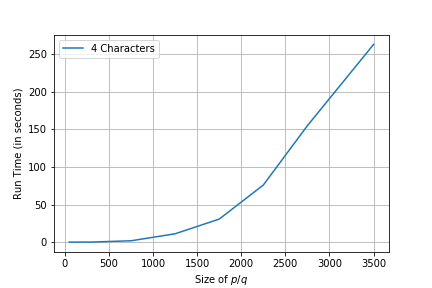

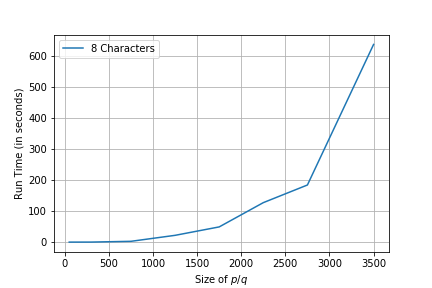

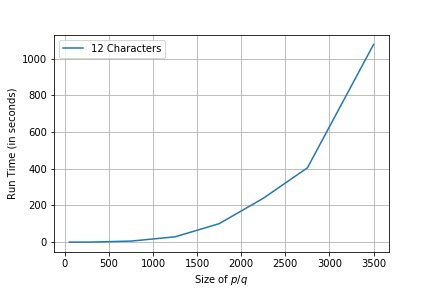

In [17]:
from IPython.display import Image, display
list_of_images = [r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\all-letters_4-char.png', 
                  r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\all-letters_8-char.png', 
                  r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\all-letters_12-char.png']
for picture in list_of_images:
    display(Image(filename=picture))

You can see that all three graphs have approximately the same shape. Even though they are across different run times. With respect to each graph's scale, they appear to mirror the shape of the graph of $O(n^2)$. The question becomes, does this hold true against the different input values? If the testing is correct, and the algorithm consistent, you should graphs with the same shape graphs as the ones above. 

Here are the graph results of all of the number and symbol cases: I will talk about the results following the graphs. 

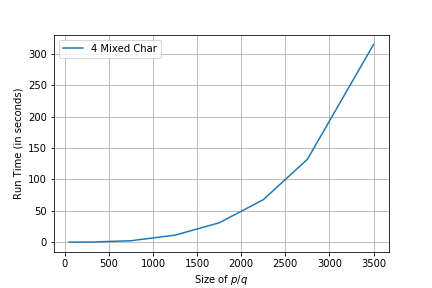

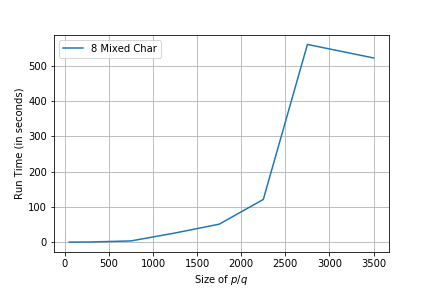

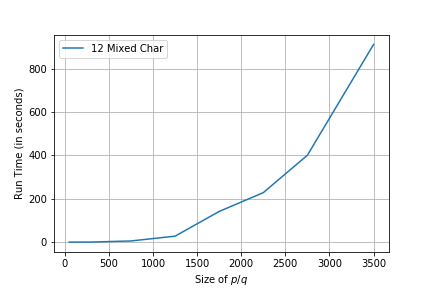

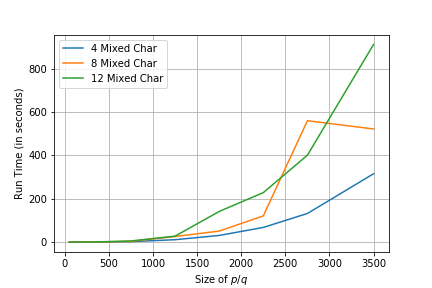

In [18]:
from IPython.display import Image, display
list_of_images = [r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\num-sym_4-char.png', 
                  r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\num-sym_8-char.png', 
                  r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\num-sym_12-char.png',
                  r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\all-num-sym_all-cases.png']
for picture in list_of_images:
    display(Image(filename=picture))

As you can see, most of the graphs above mirror the shape that we are looking for. The 4 character and 12 character cases almost perfectly match the shape of their respective all-letter cases. However one of the cases, the 8 character case has a differently shaped graph than the others. I consider this an outlier case. A irregularity must have happened with the testing run that caused the graph to change shape. When you look closer, you can see that the run time value of the 7th case seems significantly awry. It should fall between the lines of the 4 and 12 character cases. Because this is the only data point in all of the cases that falls out of place, the trend stays consistent.  

Here are the graphs of every case put together:

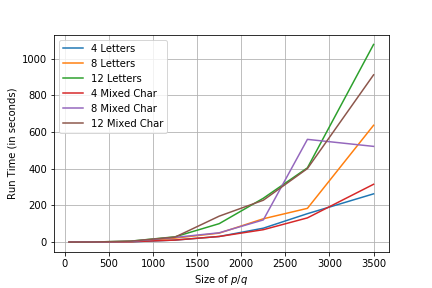

In [19]:
from IPython.display import Image, display
list_of_images = [r'C:\Users\Nick\Documents\Python Scripts\RSA Graphs\all-cases.png']
for picture in list_of_images:
    display(Image(filename=picture))

No matter what the message input, the shape of the graph should mirror the same path. If the shapes of all of the graphs mirror the same path across their respective scales, we can say the algorithm is consistent but varies based on the input message. This makes sense, that a longer message will take longer to run. However, it does not mean that a message twice the length will run in twice the time. To see the effect that the input length has on the time, we can take a look at the run times for one of the all-letter cases. 

| Range of $p$ and $q$ |  'dYQc' | 'TajaAxim' | 'ZgmmFsVOpYtd' |
| --- | --- | --- | --- |
| 2000 - 2500 | 75.95770495414735 | 127.21466520309448 | 239.15254046440123 |

As you can see for the first case, the 4 character case, the time is 75.95770495414735 seconds. For the second message length, 8 characters, the time is 127.21466520309448. This is just under twice the time of the first case. If this pattern were to continue, the third case of 12 characters case should be around 190. But, the actual value of the third case is 239.1525404644012, just under twice that of the second case. This means it is close to 4 times the time of the first case. This is approaching the trend of $O(n^2)$. 

## RSA Algorithm - Observations and Conclusions 

It is not definitive to say, based on the cases outlined above, the RSA Algorithm is explicitly $O(n^2)$. With only three cases, you can see a pattern, but you cannot see the big picture. It is only with significant extended testing, that the true complexity could be seen. This is because there is such a huge difference between the values and messages that I tested, and the ones that are used in practice. The values and messages used in practice are often over 100 times (nearly 150 times) larger than the ones that I tested. 

However, given the patterns seen by the test data, I can say that the RSA Algorithm mirrors the complexity of $O(n^2)$. Upon further research, this was confirmed by multiple sources online. One source$_3$ said the worst case of RSA Algorithm can reach complexity of $O(n^3)$.  

Even though RSA is known around the world by mathematicians, cryptographers, and computer scientists; it is still widely regarded as one of the hardest algorithms to crack. This is because of the asymmetrical nature of the encryption and decryption keys. With this being true, in most cases RSA cryptography is slow so it is not typically used to encrypt large pieces of data. 

One thing that I have noticed is that certain parts of the algorithm run faster than others. It seems that the 'generate_keypair()' function runs much faster than the rest of the functions. Compared to the rest of the algorithm, this function will run almost instantaneously. The 'encrypt()' function ran quickly, but with certain key values, it ran slower. However, the 'decrypt()' function ran significantly slower than the other two parts of the algorithm. As I was watching the various runs of the algorithm, the majority of time was spent waiting for the message to be decrypted. It should be noted that I did not time each part of the algorithm. These are simply observations from watching the runs and reviewing the output the script generates. 

If I were to adjust how I carried out this analysis, I would change a number of things. First, I would have started testing earlier. Because running the script runs the algorithm 25 times, each test case can take a long time to run. Especially with the higher value $p$ and $q$. For some of the cases, the algorithm took upwards of 6 hours to run completely. If I had known this, I would have planned for it and I would have started testing earlier. 

Next, late in the process, I had the idea of comparing the random $E$ value method to the set value of 65536 that is often used in real-world applications. I wondered if the value of $E$ matters as much as I thought it did when developing the script. If I were to adjust how I carried out this analysis, I would run several comparisons in performance between the value of 65536 and the random value for $E$. 

One thing that would have helped me understand the specific workings of the parts of the algorithms would be to time them while running. I mentioned above that some parts of the algorithm seemed to take longer than others. To empirically measure the time complexity of the specific functions, I should have timed each part separately, as well as together. This would have allowed me to verify the theoretical time complexities of each part of the algorithm. 

A small but difficult change I would have liked to make, would be to optimize my test script. It performs how I designed it, but it is not efficient. Due to how it was designed, it runs in over $O(n^2)$ time. If I were to extend the testing of the algorithm, the testing script would have to be optimized.  

Finally, I would have liked to test higher values of both $p$ and $q$ values and message lengths. It was hard to definitively determine the complexity with only 2 sets of 3 cases. I could start to see a pattern in the results, but there cannot be a strong determination of time complexity without more cases. I would have liked to test message lengths of up to 50 characters, to test how quickly the results accelerate. I would test $p$ and $q$ inputs up to 32 bits. This corresponds to integer values of about 2,000,000. In order for this to happen, the program needs to be optimized, cutting out the un-needed parts of code, as mentioned above. I wonder how long $p$ and $q$ values with 32 bits would take to run in my script.  

Overall, I enjoyed working on this project throughout the course of this whole semeseter. At first, trying to wrap my head around the RSA Algorithm was difficult, but once I dove into the code behind each piece of the algorithm, I understood and enjoyed working on the code. I sometimes ran into problems with the algorithm working correctly, but by taking the problem and looking at it piece-by-piece I was able to solve these problems.    

## References

* https://ijcsit.com/docs/Volume%205/vol5issue04/ijcsit20140504192.pdf (Used for overall knowledge of RSA)
* https://sites.math.washington.edu/~morrow/336_09/papers/Yevgeny.pdf (Used for overall knowledge of RSA)
* https://codereview.stackexchange.com/questions/174336/rsa-algorithm-implementation-in-python-3 (Used part of code)
* https://gist.github.com/JonCooperWorks/5314103 (Used part of code)
* https://en.wikibooks.org/wiki/Algorithm_Implementation/Mathematics/Extended_Euclidean_algorithm#Modular_inverse (Used for knowledge of Euclidean Algorithm)
* https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.682.1355&rep=rep1&type=pdf (Used for knowldedge of RSA)
* https://www.quora.com/What-is-the-complexity-of-RSA-cryptographic-algorithm (Used for Complexity Analysis)

$_1$ Two numbers are said to be relatively prime (or coprime) when the only positive number that divides them is 1. (GCD = 1) <br>
$_2$ Eulicid's Algorithm is a tool used to find the GCD (Greatest Common Divisor) of two numbers. <br>
$_3$ Sumanta Chatterjee, 3/22/2016 - https://www.quora.com/What-is-the-complexity-of-RSA-cryptographic-algorithm
